# Laboratório de Simulações Numéricas (PME3201)

## Quarta Experiência: Dinâmica do Ponto

#### Preparação do Ambiente

- matplotlib para apresentação gráfica
- numpy para operações de álgebra linear
- scipy para a integração numérica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### 1) Primeiro Problema


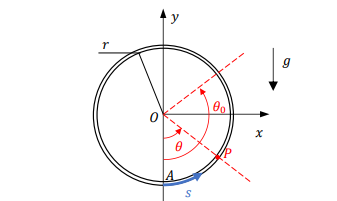

O sistema acima pode ser modelado pela seguinte equação diferencial:

$$
    \ddot{\Theta} + \frac{g}{r}sin(\Theta) = 0
$$

#### a) Espaço  de Estados

Em forma de espaço de estados, por substituição de variáveis, tem-se o seguinte:

\begin{equation}
    \begin{aligned}
        x_1 = \Theta \\
        x_2 = \dot{\Theta}\\\\

        \dot{x_1} = x_2 \\
        \dot{x_2} = -\frac{g}{r}sin(x_1)
    \end{aligned}
\end{equation}

In [2]:
def model(t, z):
    theta, omega = z 
    domegadt = -(g/r)*np.sin(theta)
    
    return [omega, domegadt]

#### Definição de Parâmetros

In [3]:
rho = 8940  # kg/m^3
r_p = 0.001 # m 
r = 1 # m
g = 9.8 # m/s^2

#### b) Função de Integração

Uma função equivalente está na biblioteca solve_ivp do Python, com o método de Runge-Kutta de terceira ordem

#### c) Simulações

##### Definição das Condições Iniciais do primeiro caso

In [4]:
theta_0 = [np.radians(-1), 2*np.pi/3, np.radians(179)]
omega_0 = [0, 0, 0]
z0 = list(zip(theta_0, omega_0)) # zip de vetores para condições iniciais

Integração

In [5]:
# Tempo de simulação
t_span = [0, 10]  # de 0 a 10 segundos
sol = []

for n in range(3):
    solution = solve_ivp(model, t_span, z0[n], method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    sol.append(solution)  # Adicione o resultado ao final da lista sol

Plot dos Resultados

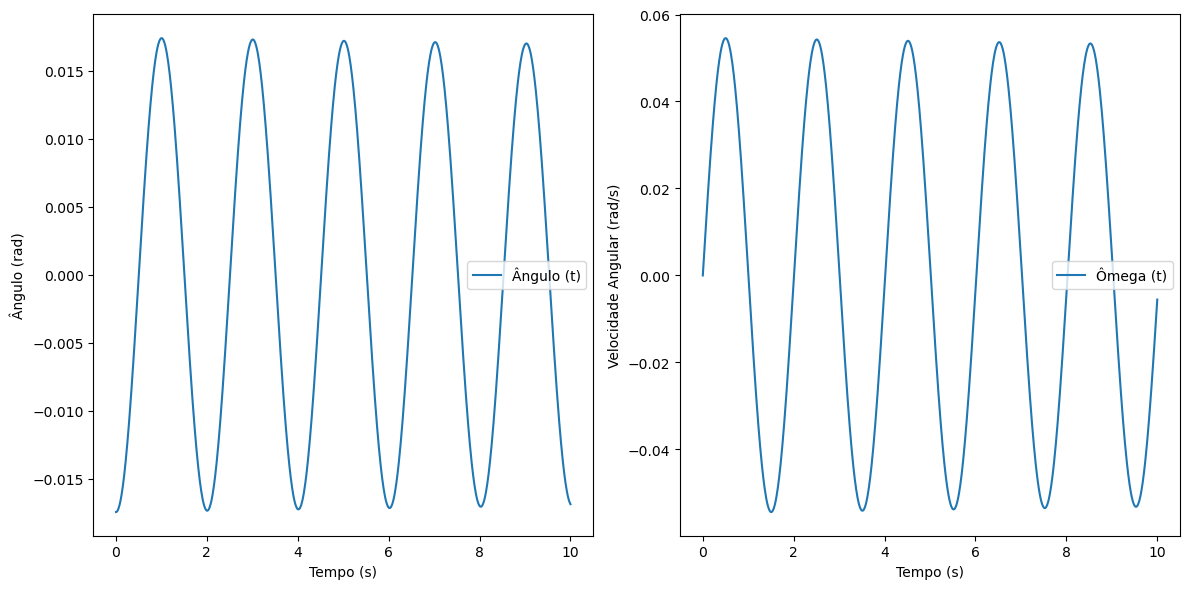

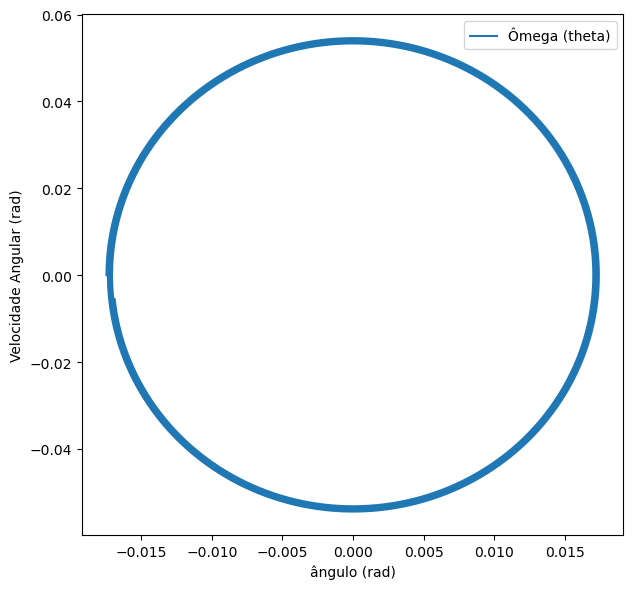

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[0].t, sol[0].y[0], label='Ângulo (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (rad)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol[0].t, sol[0].y[1], label='Ômega (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[0].y[0], sol[0].y[1], label='Ômega (theta)')
plt.xlabel('ângulo (rad)')
plt.ylabel('Velocidade Angular (rad)')
plt.legend()

plt.tight_layout()
plt.show()

Definição das Condições Iniciais do segundo caso

Plot dos Resultados

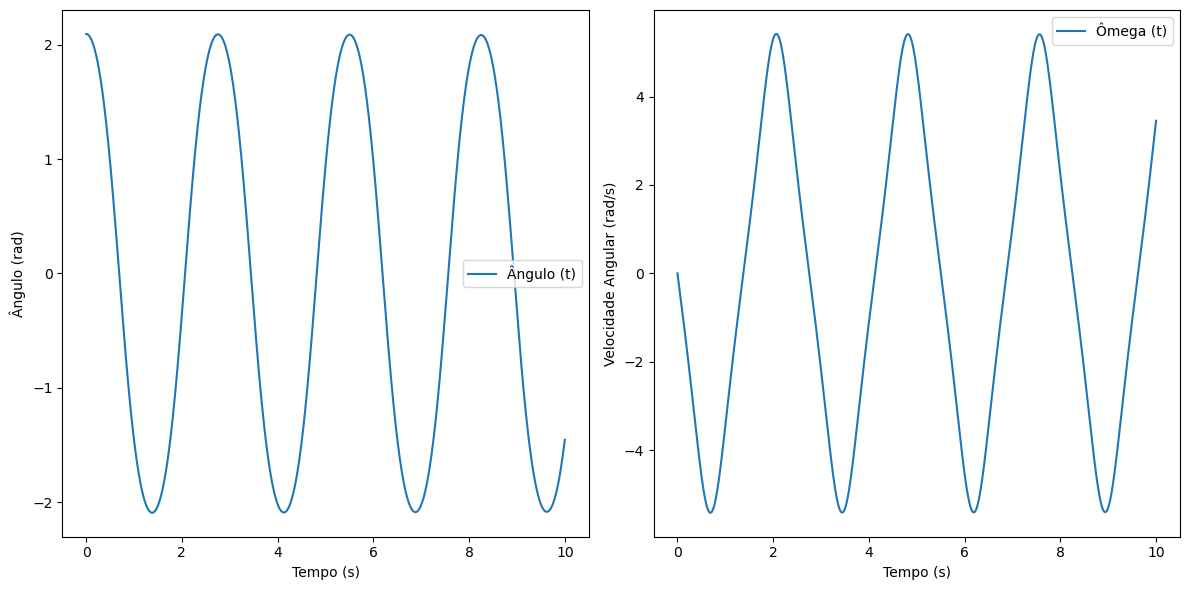

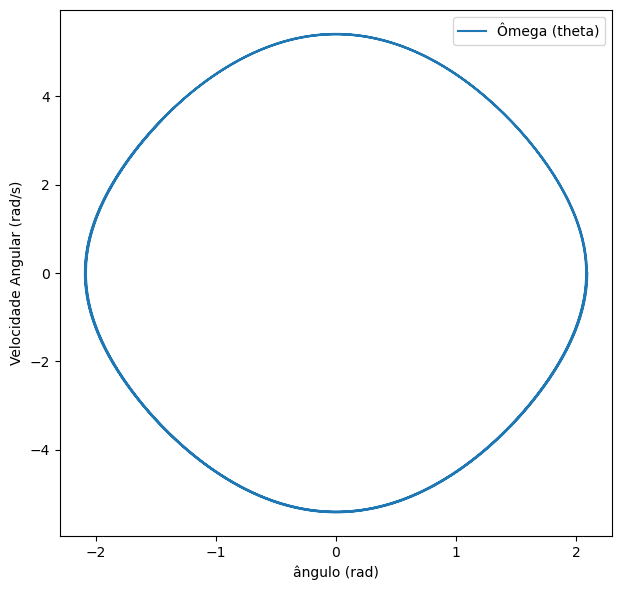

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[1].t, sol[1].y[0], label='Ângulo (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (rad)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol[1].t, sol[1].y[1], label='Ômega (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[1].y[0], sol[1].y[1], label='Ômega (theta)')
plt.xlabel('ângulo (rad)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

Verifica-se que, à medida que o ângulo aumenta, a solução se aproxima de uma elipse no plano de fase

Plot dos Resultados

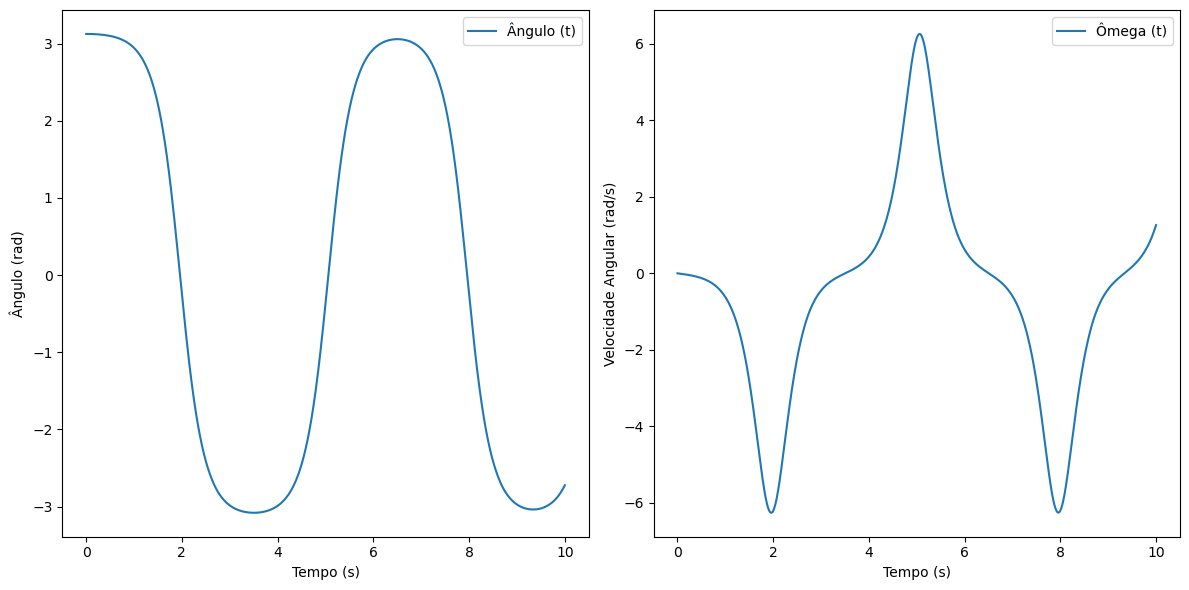

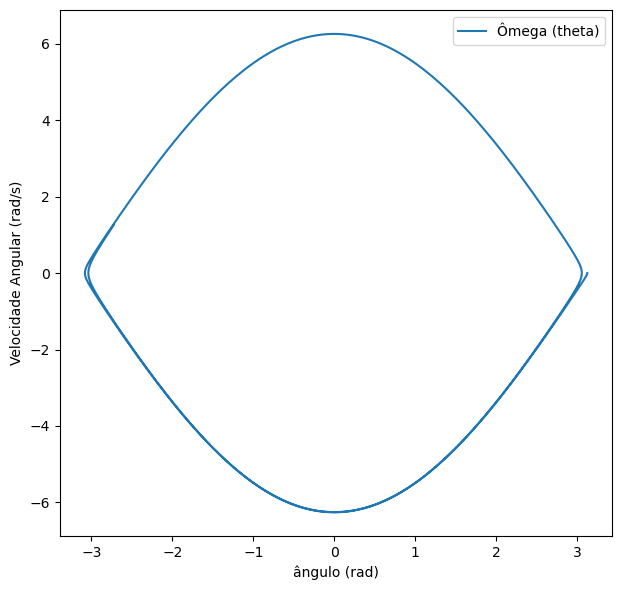

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[2].t, sol[2].y[0], label='Ângulo (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (rad)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol[2].t, sol[2].y[1], label='Ômega (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[2].y[0], sol[2].y[1], label='Ômega (theta)')
plt.xlabel('ângulo (rad)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

Gráfico das Energias

Em relação à Energia Potencial:

$$
    V = mgr(1 - cos \left(\Theta \right)) 
$$

Não há dados sobre a massa, senão da sua densidade: $m=\rho v$ e raio (volume): $v = \frac{4}{3}\pi r_p^3$

$$
    V = \rho \frac{4}{3} \pi r_p^3 r (1 - cos \left(\Theta) \right)
$$

Em relação à Energia Cinética:


$$
    T = \frac{1}{2}mr^2 \dot{\Theta}^2
$$

Analogamente:

$$
    T = \frac{2}{3} \rho \pi r_p^3 r^2 \dot{\Theta}^2
$$

Com isso, a nergia final do sistema fica:

$$
    E = \frac{\rho \pi r_p^3}{3} \left(4 r (1 - cos \left(\Theta) \right) + 2 r^2 \dot{\Theta}^2 \right)
$$

Primeira Situação

In [9]:
# Função para calcular a energia potencial
def potential_energy(theta):
    return m * g * r * (1 - np.cos(theta))

# Função para calcular a energia cinética
def kinetic_energy(omega):
    return (1/2) * m * (r**2) * (omega**2)

# Calcular as energias para cada solução
energies = []
for n in range(3):
    theta_values = sol[n].y[0]  # valores de theta a partir da solução
    omega_values = sol[n].y[1]  # valores de omega a partir da solução
    
    m = rho * (4/3) * np.pi * r_p**3  # massa da esfera
    
    potential_energies = potential_energy(theta_values)
    kinetic_energies = kinetic_energy(omega_values)
    total_energies = potential_energies + kinetic_energies
    
    energies.append([potential_energies, kinetic_energies, total_energies])

Primeiro Caso

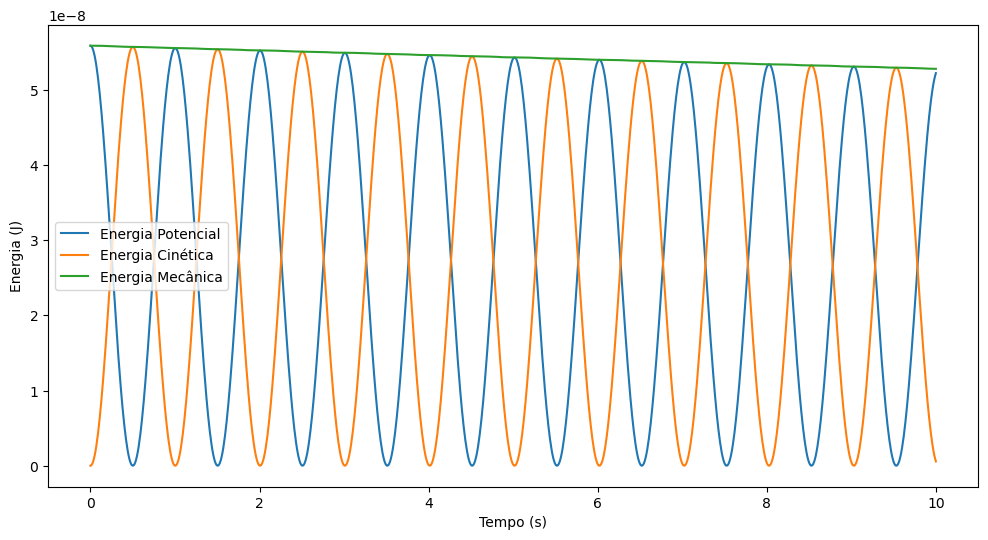

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(sol[0].t, energies[0][0], label='Energia Potencial')
plt.plot(sol[0].t, energies[0][1], label='Energia Cinética')
plt.plot(sol[0].t, energies[0][2], label='Energia Mecânica')

plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend()
plt.show()

Segundo Caso

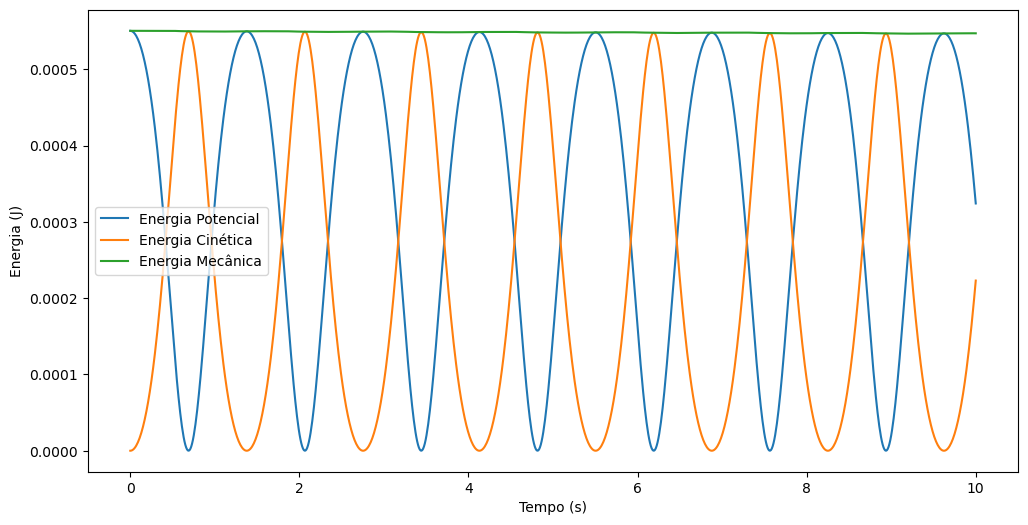

In [11]:
plt.figure(figsize=(12, 6))

plt.plot(sol[1].t, energies[1][0], label='Energia Potencial')
plt.plot(sol[1].t, energies[1][1], label='Energia Cinética')
plt.plot(sol[1].t, energies[1][2], label='Energia Mecânica')

plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend()
plt.show()

Terceiro Caso

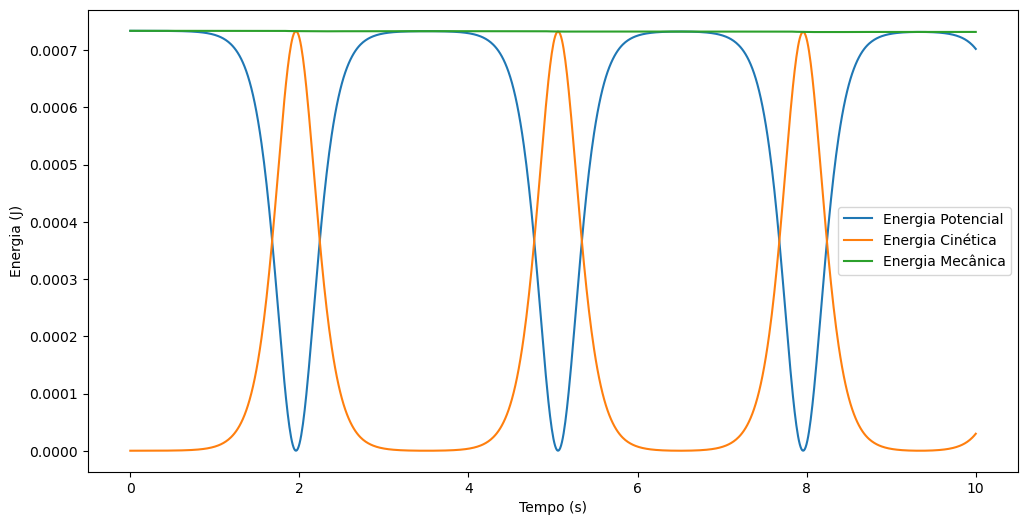

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(sol[2].t, energies[2][0], label='Energia Potencial')
plt.plot(sol[2].t, energies[2][1], label='Energia Cinética')
plt.plot(sol[2].t, energies[2][2], label='Energia Mecânica')

plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend()
plt.show()

#### d) Função Elementar de Derivação

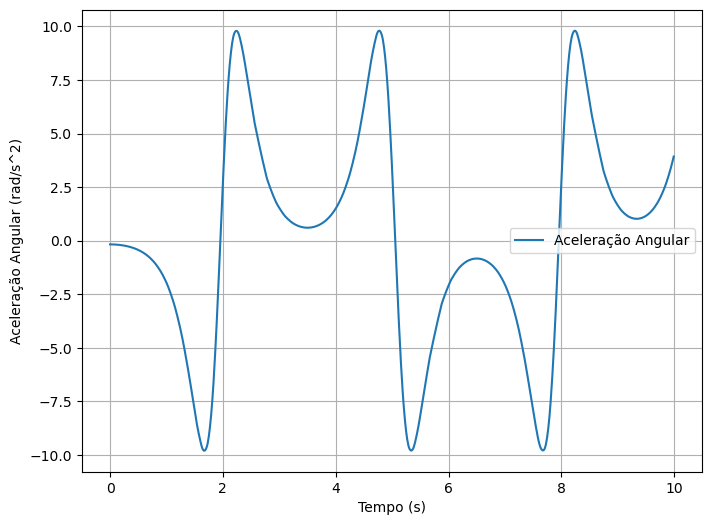

In [13]:
# Calculando a aceleração angular usando diferenças finitas
t = solution.t
omega = solution.y[1]
delta_t = t[1] - t[0]  # Intervalo de tempo entre pontos
acceleration = np.diff(omega) / delta_t  # Aceleração usando diferenças finitas

# Removendo o último ponto de t para ter a mesma dimensão que a aceleração
t = t[:-1]

# Plotando a aceleração angular
plt.figure(figsize=(8, 6))
plt.plot(t, acceleration, label='Aceleração Angular')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração Angular (rad/s^2)')
plt.legend()
plt.grid(True)
plt.show()

### 1) Segundo Problema

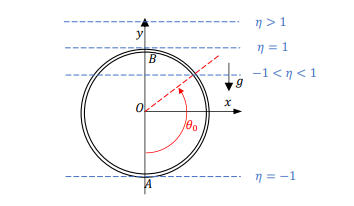

A equação governante que será analisada é a seguinte

$$
\phi(t) = \left(\frac{d \Theta}{dt} \right)^2 = 2 \omega^2(\eta + cos (\Theta))
$$

#### a) Gráfico de Relação

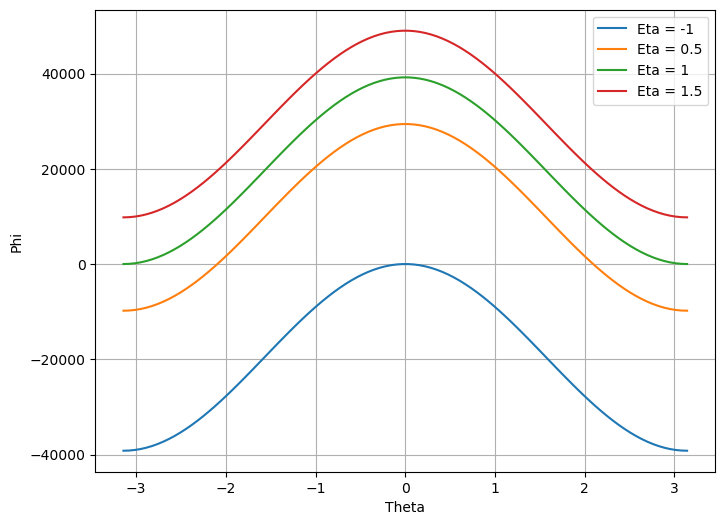

In [14]:
def phi(eta, theta):
    return (2 * g)/(r_p)*(eta + np.cos(theta))

etas = [-1, 0.5, 1, 1.5]
thetas = np.linspace(-np.pi, np.pi, 100)

plt.figure(figsize=(8, 6))  # Cria uma figura para todos os gráficos
for eta in etas:
    phis = []
    for angle in thetas:
        phis.append(phi(eta, angle))
    plt.plot(thetas, phis, label=f'Eta = {eta}')

plt.xlabel('Theta')
plt.ylabel('Phi')
plt.legend()
plt.grid(True)
plt.show()

    


#### b) Simulações

Definindo uma nova função de modelagem do problema